# Start simple: show the class works for a small grid

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from grid import WorkJourney

# Reinforcement Learning Coursework

## 1. Simple Q-Learning example

The idea is for the agent to travel from home (cell 6) to work (buiding robots of course - cell 35). The agent wants to get to work quickly, buy some croissants for breakfast and collect some cogs to build the robots with. When walking the robot can move to adjacent squares in one time step. It cannot cross walls - marked with heavy lines. It can take the tube which transports it from circle to circle on the red or blue lines in one time step. Falling in the pond is really unpleasant and should probably be avoided.

Rewards are as follows:
* Cell 35: +15
* Cell 10: +200 for first visit, -1 for subsequent visits
* Cell 32: +200 for first visit, -1 for subsequent visits
* Cell 16: and 27: -15
* All other cells: -1

There will therefore be 4 reward matrices conditional on whether cells 11 and 33 have been visited or not.

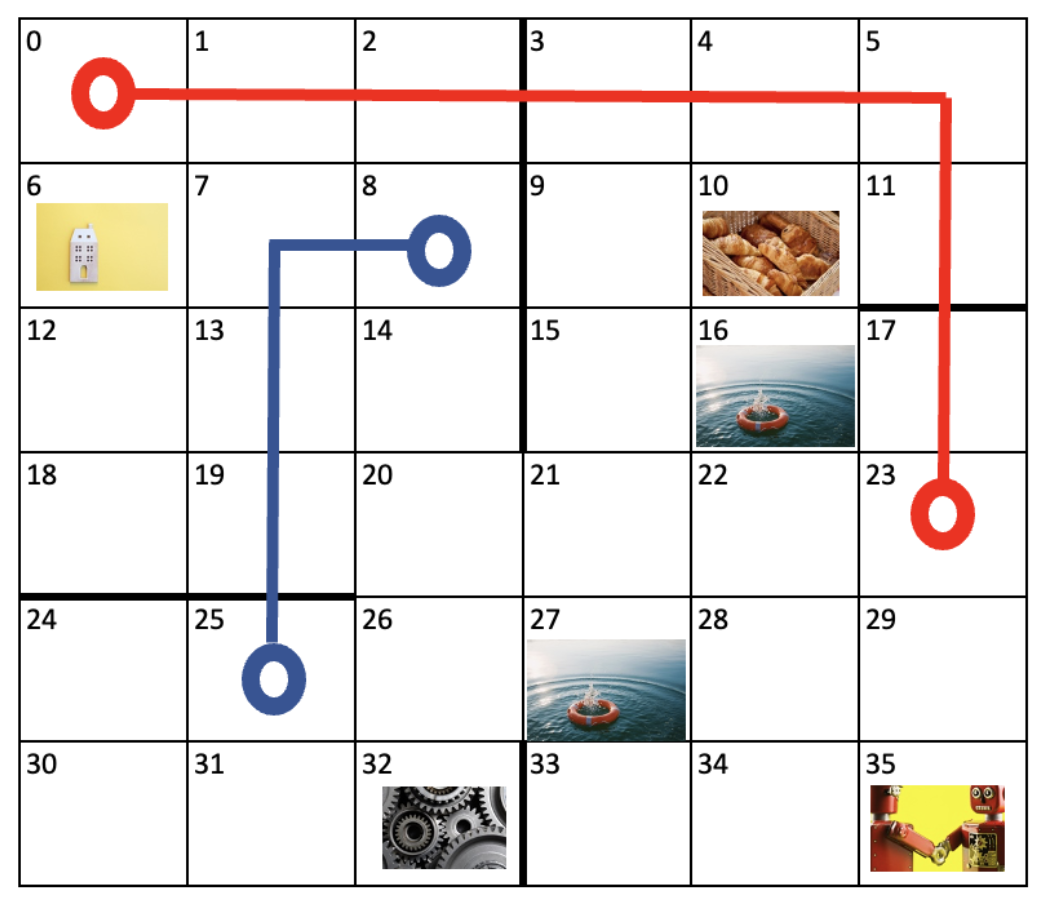

#### Create game object

* `reward_dict` helps build the initial reward matrix

In [2]:
reward_dict = {'r_time' : -1, 
               'r_pond' : -15,
               'r_croissant' : 200,
               'r_cogs' : 200,
               'r_work' : 15}
ob = WorkJourney(reward_dict, max_steps=500, max_episodes=2000, 
                 start_state=6, goal_state=35)

### Display reward matrix

This game is creates a large R and Q matrix. The display_matrix function allows all columns to be displayed, but user can also restrict the rows/columns of R or Q matrix if a particular part of it is of interest.

In [3]:
Ri = ob.RM[0,0]
ob.display_matrix(Ri, 20, None)

# to see full matrix do, uncoment below:
# ob.display_matrix(Ri, None, None)

,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
20,-1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN
26,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,-15.0,NaN,NaN,NaN,NaN,200.0,NaN,NaN,NaN
27,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,-15.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
28,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-15.0,-1.0,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN
29,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,15.0


## Run one episode

First have to initialise a Q matrix to pass into `run_episode`. We also set hyper parameter values

The `run_episode` method returns a tuple:
* Rtot is floating point number with total reward earnt during the episode
* Q is the Q matrix at the end of the episode
* ar_pairs is an array of dimanetion (max.steps, 2). The first column of values are the actions taken per step, and the second column are the rewards. This is useful to look at to understand what the agent is doing in a given episode.

In [4]:
Q = ob.create_Q()
alpha = 1.
gamma = 0.8
epsilon = 0.9

Rtot, Q, ar_pairs = ob.run_episode(Q, alpha, gamma, epsilon)

The total reward earned during the first episode is below:

In [5]:
Rtot

-28.0

`ar_pairs` is really powerful. We use it to check how many times the agent falls in the pond (a lot - this is model free after all!), to check that agent only collects 200 once for visiting each of croissant and cogs, and finally to check the rewards each time the agent visited cell 32 (it collected 200 the first time, but -1 the following times, so our code is using the correct reward matrix it seems)

In [6]:
ar_pairs[ar_pairs[:,1]< -5]

array([[ 16., -15.],
       [ 16., -15.],
       [ 16., -15.],
       [ 16., -15.],
       [ 27., -15.],
       [ 27., -15.],
       [ 27., -15.],
       [ 27., -15.],
       [ 27., -15.],
       [ 27., -15.],
       [ 16., -15.],
       [ 16., -15.],
       [ 16., -15.],
       [ 27., -15.]])

In [7]:
ar_pairs[ar_pairs[:,1]> 10]

array([[ 32., 200.],
       [ 10., 200.],
       [ 35.,  15.]])

In [8]:
ar_pairs[ar_pairs[:,0] == 32]

array([[ 32., 200.],
       [ 32.,  -1.],
       [ 32.,  -1.],
       [ 32.,  -1.],
       [ 32.,  -1.],
       [ 32.,  -1.]])

## Run a complete Q-learning cycle

First define remaining hyper parameters. We use alpha = 1, gamma = 0.8, epsilon = 0.9 as above.

The `Q_learning` method returns a tuple:
* Qs which is an array of size (max_episodes, num_cells, num_cells). Qs\[i, :, :\] is the Q matrix for episode i.
* Rtot is an array of size (max_episodes) and contains the total reward earned at each episode
* ar_pairs is an array of size (max_episodes, max_steps, 2) which shows the movement and reward history of the agent for all episodes. ar_pairs\[i,j,0\] denoate the action taken in episode i on step j. ar_pairs\[i,j,1\] denotes the reward at episode i on step j.

In [9]:
epsilon_dict = {'epsilon':1.0,
                'epsilon_decay_1':0.9999,
                'epsilon_decay_2':0.999,
                'epsilon_decay_threshold':0.5}

Rtot, Qs, ar_pairs = ob.Q_learning(alpha, gamma, eps_dict=epsilon_dict)

### Visualise training progress and convergence

This can be implemented as methods or functions. Just haven't had time to do yet.

The moving average of total reward chart is really interesting: the agent does badly to start with and then suddenly finds a better route.

final Q matrix is:



,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
20,3,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0
21,3,5,5,0,0,0,0,-3,0,0,0,0,0,0,0,0
22,0,3,5,8,0,0,0,0,8,0,0,0,0,0,0,0
23,0,0,5,8,0,0,0,0,0,11,0,0,0,0,0,0
24,0,0,0,0,1,1,0,0,0,0,3,0,0,0,0,0
25,0,0,0,0,3,3,3,0,0,0,0,3,0,0,0,0
26,3,0,0,0,0,1,3,-9,0,0,0,0,3,0,0,0
27,0,8,0,0,0,0,5,-9,8,0,0,0,0,8,0,0
28,0,0,5,0,0,0,0,-9,8,11,0,0,0,0,11,0
29,0,0,0,8,0,0,0,0,8,11,0,0,0,0,0,15


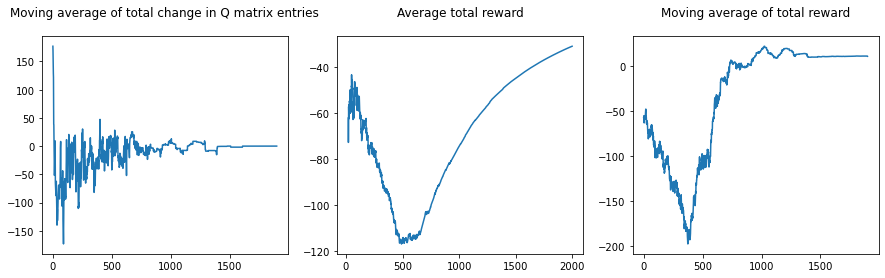

In [10]:
Q_change = np.diff(Qs.sum(axis=(1,2)))

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Q_change_ma = moving_average(Q_change, 100)
Rtot_ma = moving_average(Rtot, 100)
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))

ax1.plot(Q_change_ma)
# ax1.set_yscale('log')
ax1.set_title('Moving average of total change in Q matrix entries', fontsize=12, pad=20)

ax2.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])
ax2.set_title('Average total reward', fontsize=12, pad=20)

ax3.plot(Rtot_ma)
ax3.set_title('Moving average of total reward', fontsize=12, pad=20)

print("final Q matrix is:\n")
display(pd.DataFrame(Qs[-1]).loc[20:,20:].style.format(precision=0))
print("")

Can show the best route done by a greedy agent who always choses the best option:

Check out the best route. Can it by true?! It's a pretty rubbish route!

In [21]:
ar_pairs[-1][~np.isnan(ar_pairs[-1, :, 0])]

array([[  0.,  -1.],
       [ 23.,  -1.],
       [ 29.,  -1.],
       [ 28.,  -1.],
       [ 27., -15.],
       [ 33.,  -1.],
       [ 34.,  -1.],
       [ 35.,  15.]])

### Can we find a better solution?

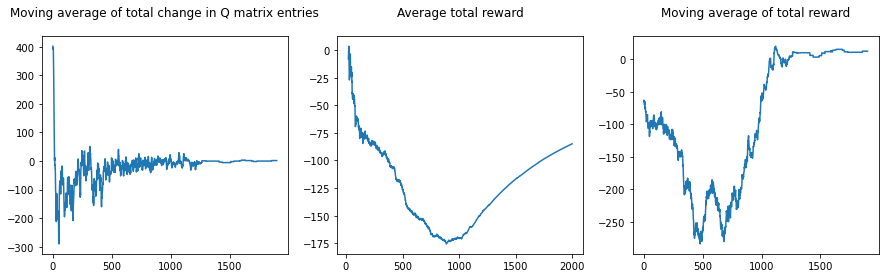

In [26]:
alpha = 0.8
gamma = 0.9
epsilon_dict = {'epsilon':1.0,
                'epsilon_decay_1':0.9999,
                'epsilon_decay_2':0.999,
                'epsilon_decay_threshold':0.5}

Rtot, Qs, ar_pairs = ob.Q_learning(alpha, gamma, eps_dict=epsilon_dict)

Q_change = np.diff(Qs.sum(axis=(1,2)))

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Q_change_ma = moving_average(Q_change, 100)
Rtot_ma = moving_average(Rtot, 100)
Rtot_avg = Rtot.cumsum() / np.arange(1, len(Rtot) + 1)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))

ax1.plot(Q_change_ma)
# ax1.set_yscale('log')
ax1.set_title('Moving average of total change in Q matrix entries', fontsize=12, pad=20)

ax2.plot(np.arange(20, len(Rtot_avg)), Rtot_avg[20:])
ax2.set_title('Average total reward', fontsize=12, pad=20)

ax3.plot(Rtot_ma)
ax3.set_title('Moving average of total reward', fontsize=12, pad=20);

In [25]:
ar_pairs[-1][~np.isnan(ar_pairs[-1, :, 0])]

array([[ 0., -1.],
       [23., -1.],
       [29., -1.],
       [35., 15.]])

This is a better route, but it's still rubbish! Why not collect the croissant or cogs?!